In [4]:
import numpy as np
import scipy.special as sc
from scipy . integrate import quad

Зададим массив узлов

In [3]:
mas_node=np.zeros(30)
for i in range(30):
    mas_node[i]=np.cos((np.pi+2*np.pi*i)/60)
mas_node

array([ 0.99862953,  0.98768834,  0.96592583,  0.93358043,  0.89100652,
        0.83867057,  0.77714596,  0.70710678,  0.62932039,  0.54463904,
        0.4539905 ,  0.35836795,  0.25881905,  0.15643447,  0.05233596,
       -0.05233596, -0.15643447, -0.25881905, -0.35836795, -0.4539905 ,
       -0.54463904, -0.62932039, -0.70710678, -0.77714596, -0.83867057,
       -0.89100652, -0.93358043, -0.96592583, -0.98768834, -0.99862953])

Составим матрицу СЛАУ для метода неопределённых коэффициентов

In [4]:
A=np.zeros((30,30))
for i in range(30):
    for j in range(30):
        A[i][j]=mas_node[j]**i
A

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 9.98629535e-01,  9.87688341e-01,  9.65925826e-01,
         9.33580426e-01,  8.91006524e-01,  8.38670568e-01,
         7.77145961e-01,  7.07106781e-01,  6.29320391e-01,
         5.44639035e-01,  4.53990500e-01,  3.58367950e-01,
         2.58819045e-01,  1.56434465e-01,  5.23359562e-02,
        -5.23359562e-02, -1.56434465e-01, -2.58819045e-01,
        -3.58367950e-01, -4.53990500e-01, -5.44639035e-

Найдём вектор свободных коэффициентов

In [5]:
b=np.zeros(30)
for i in range(0,30,2):
    b[i]=sc.beta((i+1)/2,0.5)
b

array([3.14159265, 0.        , 1.57079633, 0.        , 1.17809725,
       0.        , 0.9817477 , 0.        , 0.85902924, 0.        ,
       0.77312632, 0.        , 0.70869912, 0.        , 0.65807776,
       0.        , 0.6169479 , 0.        , 0.58267301, 0.        ,
       0.55353936, 0.        , 0.52837848, 0.        , 0.50636271,
       0.        , 0.48688722, 0.        , 0.4694984 , 0.        ])

Вычисляем коэффициенты квадратуры

In [6]:
c = np.linalg.solve(A, b)
c

array([0.10471977, 0.1047197 , 0.10471984, 0.10471964, 0.1047199 ,
       0.10471958, 0.10471996, 0.10471953, 0.10471999, 0.10471951,
       0.10471999, 0.10471954, 0.10471994, 0.10471961, 0.10471986,
       0.1047197 , 0.10471977, 0.10471977, 0.10471971, 0.10471982,
       0.10471968, 0.10471984, 0.10471967, 0.10471984, 0.10471968,
       0.10471982, 0.1047197 , 0.1047198 , 0.10471973, 0.10471976])

Вычисляем значение интеграла при помощи квадратурной формулы

In [7]:
s=0
for i in range(30):
    s=s+c[i]*np.cos(mas_node[i])
print(f'{s:.20f}')

2.40393943063441239971


Вычислим интеграл при помощи встроенной функции библиотеки SciPy

In [8]:
I = quad (lambda x:np.cos(x)/(np.sqrt(1-x**2)), -1, 1)
I


(2.403939430634341, 7.624922915283605e-11)

Найдём узлы для других систем ортогональных многочленов

In [9]:
n=9
A=np.zeros(n+2)
B=np.zeros(n+2)
C=np.zeros(n+2)
for i in range(n+2):
    A[i]=(2*i+1)/(i+1)
    C[i]=i/(i+1)

In [10]:
M=np.zeros((n+1,n+1))
for i in range(n):
    M[i+1][i]=C[i+1]/A[i+1]
    M[i][i+1]=1/A[i]

In [11]:
x, p = np.linalg.eig(M)
p=np.transpose(p)
def f(x):
    return np.sqrt(1-x**2) #np.cos(x)
nu=np.zeros(n+1)
for i in range(n+1):
    for j in range(n+1):
        nu[i]=nu[i]+p[i][j]**2
    nu[i]=1/nu[i]
a=np.zeros(n+1)
for k in range(n+1):
    for i in range(n+1):
        a[k]=a[k]+nu[i]*f(x[i])*p[i][k]
    a[k]=a[k]*np.sqrt(k+0.5)

In [12]:
def I(t):
    b=np.zeros(n+3)
    for k in range(n,-1,-1):
        b[k]=a[k]+(A[k]*t+B[k])*b[k+1]-C[k+1]*b[k+2]
    return b[0]*np.log(np.abs((t+1)/(t-1)))-b[1]*np.sqrt(2)*A[0]

In [13]:
I(0.5)

-2.423349021015467

$$\int_{0}^{1} \ \frac{f(x)}{x-t}dx 

In [14]:
def U(n,x):
    return np.sin((n+1)*np.arccos(x))/np.sqrt(1-x**2)
def T(n,x):
    return np.cos(n*np.arccos(x))

In [15]:
n=200
def f(x):
    return np.sin(1-x**2)
def I(t):
    T1=np.zeros((2, n))
    A=np.zeros(n)
    B=np.zeros(n)
    for k in range(n):
        T1[0][k]=np.cos((np.pi*(2*n-3-2*k))/(2*n-2))
        T1[1][k]=np.cos((np.pi*(2*n-1-2*k))/(2*n))
        A[k]=(T(n-1,t)*U(n-1,t)-1)/(n*(t-T1[1][k]))
        #(np.cos((n-1)*np.arccos(t))*np.sin(n*np.arccos(t))/np.sqrt(1-t**2)-1)/(n*(t-T[1][k]))
        B[k]=T(n-1,t)*U(n-1,t)/((n-1)*(t-T1[0][k]))
        #-(np.cos((n-1)*np.arccos(t))*np.sin(n*np.arccos(t))/np.sqrt(1-t**2))/((n-1)*(t-T[0][k]))
    B[n-1]=0
    s=0
    for k in range(n):
        s=s+A[k]*f(T1[1][k])+B[k]*f(T1[0][k])
    return s

In [16]:
I(0.5)

1.3632775200466385

$$\omega(x)=\frac{1}{\sqrt{1-x^2}} 

In [17]:
n=20
def f(x):
    return np.cos(x)
def I(t):
    mas_node=np.zeros(n)
    for i in range(n):
        mas_node[i]=np.cos((np.pi+2*np.pi*i)/(2*n))
    s=0
    eps=1e-6
    for i in range(n):
        if abs(t-mas_node[i])>eps:
            s=s+f(mas_node[i])*(U(n-1,mas_node[i])-U(n-1,t))/(n*U(n-1,mas_node[i])*(mas_node[i]-t))
        else:
            s=s+f(mas_node[i])*(mas_node[i]/n-T(n,mas_node[i])/(U(n-1,mas_node[i])*np.sqrt(1-mas_node[i]**2)))/(1-mas_node[i]**2)
    return s

In [18]:
I(0.5)

-0.23476005881901324

$$\omega(x)=\sqrt{1-x^2} 

In [19]:
n=10000
def f(x):
    return 1 #np.sin(x)/np.sqrt(1-x**2)
def I(t):
    mas_node=np.zeros(n)
    for i in range(n):
        mas_node[i]=np.cos((np.pi+np.pi*i)/(n+1))
    s=0
    eps=1e-10
    for i in range(n):
        r=(mas_node[i]*U(n,mas_node[i])-(n+1)*T(n+1,mas_node[i])/np.sqrt(1-mas_node[i]**2))/(1-mas_node[i]**2)
        if abs(t-mas_node[i])>eps:
            s=s+f(mas_node[i])*(-np.pi*T(n+1,mas_node[i])+np.pi*T(n+1,t))/(r*(mas_node[i]-t))
        else:
            s=s+f(mas_node[i])*(-np.pi*(n+1)*U(n,mas_node[i]))/r
    return s

In [20]:
I(0.5)

-1.8239592164953793

$$\omega(x)=\sqrt{\frac{1+x}{1-x}} 

In [21]:
n=1000000
def f(x):
    return 1-x #np.cos(x)
def I(t):
    mas_node=np.zeros(n)
    for i in range(n-1):
        mas_node[i]=np.cos((np.pi+np.pi*i)/n)
    s=0
    eps=1e-10
    for i in range(n):
        r=-(U(n-1,mas_node[i])+n*T(n,mas_node[i])/np.sqrt(1-mas_node[i]**2))/(1+mas_node[i])
        if abs(t-mas_node[i])>eps:
            s=s+f(mas_node[i])*(-np.pi*T(n,mas_node[i])+np.pi*T(n,t))/(r*(mas_node[i]-t))
        else:
            s=s+f(mas_node[i])*(-np.pi*n*U(n-1,mas_node[i]))/r
    return s

In [22]:
I(0.5)

-1.8239686411174016

In [23]:
def root_P(n):
    A=np.zeros(n+1)
    B=np.zeros(n+1)
    C=np.zeros(n+1)
    for i in range(n+1):
        A[i]=(2*i+1)/(i+1)
        C[i]=i/(i+1)
    M=np.zeros((n,n))
    for i in range(n-1):
        M[i+1][i]=C[i+1]/A[i+1]
        M[i][i+1]=1/A[i]
    x, p = np.linalg.eig(M)
    return x

In [24]:
def P(n,x):
    p=np.zeros(n+1)
    p[0]=1 
    p[1]=x
    for i in range(1,n,1):
        p[i+1]=(2*i+1)*x*p[i]/(i+1)-i*p[i-1]/(i+1)
    return p[n]

In [25]:
def f(x):
      return np.sin(x)
def J(t,p,n):
        x=root_P(n)
        A=np.zeros(p+1)
        w=np.zeros(n)
        for j in range(p):
            A[j]=((-1/(1+t))**(p-j)-1/(1-t)**(p-j))/(p-j)
        A[p]=np.log(abs((1-t)/(1+t)))
        for i in range(n):
               w[i]=2*(1-x[i]**2)/((n+1)*P(n+1,x[i]))**2
        s=0
        for i in range(n):
              s=s+w[i]*f(x[i])/(x[i]-t)**(p+1)
        fact=1
        for j in range(p+1):
              if j!=0:
                    fact=fact*j
              s=s+A[j]*f(t+np.pi*j/2)/fact
              for i in range(n):
                    s=s-w[i]/(x[i]-t)**(p+1-j)
        return s

In [26]:
J(0,0,50)

1.8921661407350405

In [27]:
def f(x):
      return 1
def J(t,p,n):
        x=root_P(n)
        A=((-1/(1+t))**(p-j)-1/(1-t)**(p-j))/(p-j)
        w=np.zeros(n)
        #A[p]=np.log(abs((1-t)/(1+t)))
        for i in range(n):
               w[i]=2*(1-x[i]**2)/((n+1)*P(n+1,x[i]))**2
        s=0
        for i in range(n):
              s=s+w[i]/(x[i]-t)**(p+1)
        for j in range(p+1):
              for i in range(n):
                    s=s-w[i]/(x[i]-t)**(p+1-j)
        return s

In [31]:
-np.log(3)

-1.0986122886681098

In [8]:
import matplotlib.pyplot as plt


In [34]:
def I_trapezoid(a,b,h,t):
    s=0
    n=round((b-a)/h)
    for i in range(n+1):
        if i==0 or i==n:
            s=s-((a+i*h)**2)/((a+i*h-t)*2)
        else:
            s=s-((a+i*h)**2)/(a+i*h-t)
    return s*h

C:\Users\tanya\AppData\Local\Temp\ipykernel_8276\2425823656.py:6: RuntimeWarning: divide by zero encountered in divide
  s=s-((a+i*h)**2)/((a+i*h-t)*2)


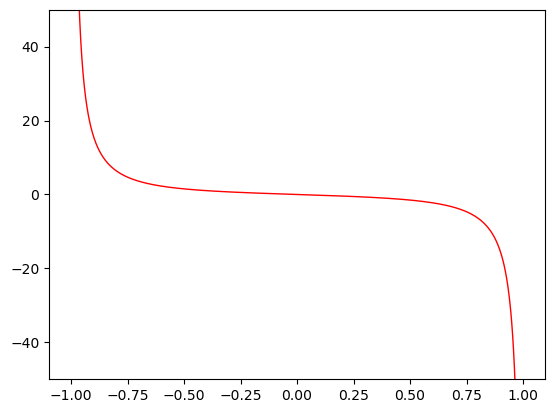

In [35]:
h=2/1000
t=np.linspace(-1,1, 1000)
y=I_trapezoid(-1,1,h,t)


plt.ylim(-50,50)
plt.plot(t,y,color='red',lw=1)

In [5]:
def I_rectangle(a,b,t):
    s=0
    h=2/100
    n=round((b-a)/h)
    for i in range(n):
        s=s+(np.exp(-(a+(i+0.5)*h)**2))/(a+(i+0.5)*h-t)
    return s*h
    I = np.vectorize(I_rectangle)

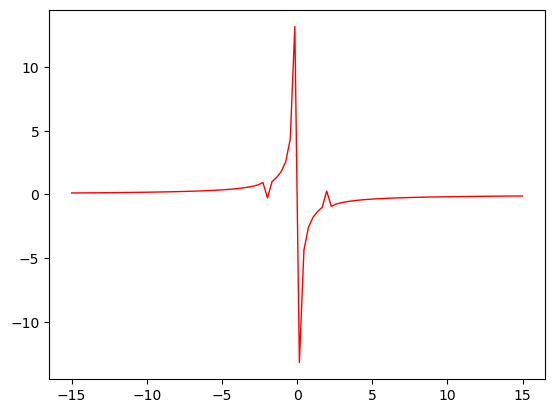

In [21]:
t=np.linspace(-15,15, 100)
y=I_rectangle(-10,10,t)


plt.plot(t,y,color='red',lw=1)